# Unsupervised Learning

The first part of this exercise will be dedicated to implementing the *K*-means **clustering** algorithm and applying it to compress an image. In the second part, the principal component analysis (PCA) will be used in order to find a low-dimensional representation of face images. 

## 1 *K*-means clustering algorithm

Powerfull unsupervised learning algorithm here will be used for image compression. 

### 1.1 Implementing *K*-means

For a given training set {$x^{(1)}, x^{(2)}, ..., x^{(m)}$}, where $x^{(i)} \in \bf{R}^n$, *K*-means algorithm cluster similar data examples together in an arbitrary number of clusters. 

The intuition behind *K*-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The *K*-means algorithm will always converge to some final set of means for the centroids, where the converged solution may not always be ideal and depends on the initial setting of the centroids. This is the reason why, in practice, the *K*-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value.

*K*-means cost function is defined as follows:

$$
J(c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k}) = \frac{1}{m} \sum_{i=1}^{m}|| x^{(i)} - \mu_{c^{(i)}} ||^2
$$

where the optimization objective is to minimize cost function and is defined as follows:

$$
\min\limits_{c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k}} J(c^{(1)}, c^{(2)}, ..., c^{(m)}, \mu{1}, \mu{2}, ..., \mu{k})
$$

#### 1.1.1 Finding closest centroids

In the first phase of the *K*-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current poisitions of centroids. For every example $i$ index of the centroid, the index of the centroid that is closest to $x^{(i)}$ is computed as:
$
c^{(i)} := j
$ that minimizes $ || x^{(i)} - \mu_{j} ||^2 $.

In [1]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
dataset = loadmat('data/ex7data2.mat')
print(dataset['__header__'])
X = dataset['X']
print(f'X shape: {X.shape}')

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011'
X shape: (300, 2)


In [3]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0] # no of rows 
    m = X.shape[0] # no of input examples
    idx = np.zeros((m, 1)) 
    
    for i in range(m):
        squared_norm = np.zeros((K, 1))
        for k in range(K):
            squared_norm[k, 0] = (np.linalg.norm(X[i, :] - centroids[k, :]))**2
        idx[i, 0] = np.where(squared_norm==np.min(squared_norm))[0][0]
    return idx.ravel() + 1.

In [4]:
K = 3 
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)

print(f'The closest centroids for the first 3 examples of the dataset: {idx[:3]}')
print('(The closest values should be 1, 3 and 2 respectively.)')

The closest centroids for the first 3 examples of the dataset: [1. 3. 2.]
(The closest values should be 1, 3 and 2 respectively.)


#### 1.1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. For every centroid *k* the mean is calculated as:

$$
\mu_{k} := \frac{1}{|C_{k}|}\sum_{i\in C_{k}}^{}X^{(i)}
$$

where $C_{k}$ is the set of examples that are assigned to centroid *k*.

In [5]:
def computeCentroids(X, idx, K):
    idx = idx.reshape(-1,1)
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        row_k, col_k = np.where(idx==k+1) # k+1: there is no 0 cluster
        centroids[k, :] = 1/len(row_k) * np.sum(X[row_k, :], axis=0)
    return centroids

In [6]:
centroids = computeCentroids(X, idx, K)
print(f'Centroids computed after initial finding of the closest centroids: {centroids}')
print('Expected values: \n[[ 2.428301 3.157924 ]\n [ 5.813503 2.633656 ]\n [ 7.119387 3.616684 ]]')

Centroids computed after initial finding of the closest centroids: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
Expected values: 
[[ 2.428301 3.157924 ]
 [ 5.813503 2.633656 ]
 [ 7.119387 3.616684 ]]


### 1.2 *K*-means on example dataset

In [7]:
def plotProgressMeans(X, centroids, idx, K, i):
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='bwr',label='data')
    plt.plot(centroids[:, 0], centroids[:, 1],
             marker='x', markersize=10, color='black',
             linestyle='None', label='current centroids')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='best')
        

def runKMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    
    for i in range(max_iters):
        print(f'K-means iteration {i+1}/{max_iters}')
        
        # for each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        # plot progress
        if plot_progress:
            plotProgressMeans(X, centroids, idx, K, i)
            plt.show()
        
        # given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

K-means iteration 1/6


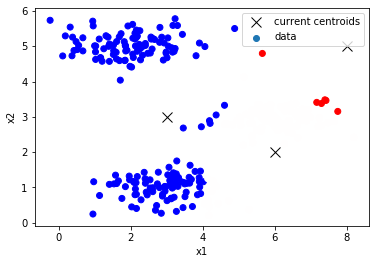

K-means iteration 2/6


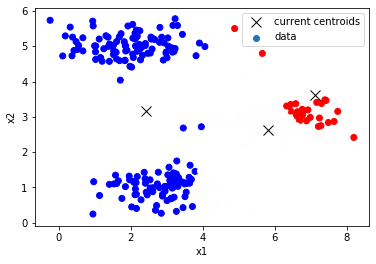

K-means iteration 3/6


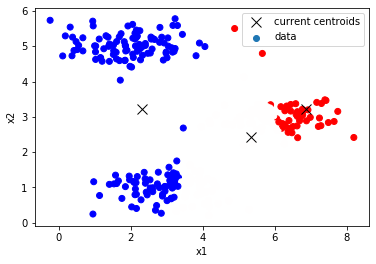

K-means iteration 4/6


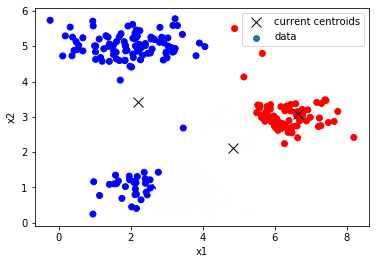

K-means iteration 5/6


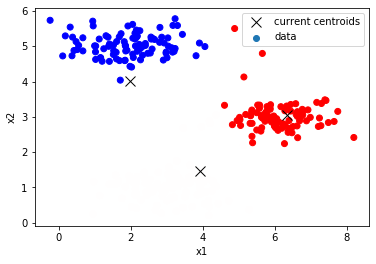

K-means iteration 6/6


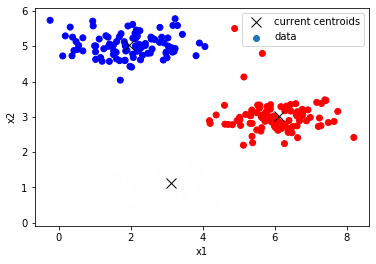

In [8]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
max_iters = 6

centroids, idx = runKMeans(X, initial_centroids, 
                           max_iters, plot_progress=True)

### Scikit Learn *K*-means clustering algorithm on the same data

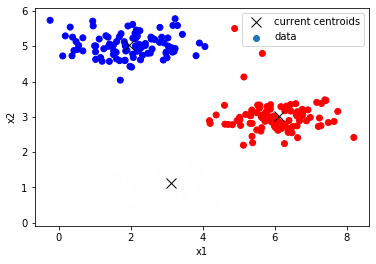

In [9]:
ootb_model = KMeans(n_clusters=3, 
                    init=initial_centroids,
                    n_init=1,
                    max_iter=5,
                    n_jobs=-1,)

skl_idx = ootb_model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=skl_idx, cmap='bwr', label='data')
plt.plot(ootb_model.cluster_centers_[:, 0], 
         ootb_model.cluster_centers_[:, 1],
         marker='x', markersize=10, color='black',
         linestyle='None', label='current centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

### 1.3 Random initialization

A good strategy for initializing the centroids is to select random examples from the training set. 
The idea is to randomly permute the indices of the examples, then select the first *K* examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.

In Sklearn's *KMeans* function, this is already implemented and is called by defining *init='random'*.

In [10]:
def KMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    
    rand_X = np.random.permutation(X)
    centroids = rand_X[:K]
    return centroids

### 1.4 Image compression with *K*-means

For this example, in a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify red, green and blue intensity values. This type of encoding is known as the RGB encoding.

The idea is making the reduction from a thousands of colors to only 16 colors. This is the way to efficiently store images by representing the RGB with 16 colors (only 4 bits for all colors, insetead of 24 for each color).

The *K*-means algorithm will be used to comress images; every pixel will be treated as a data example and will be clustered to 1 (out of 16) clusters that represents some color.

In [11]:
A = plt.imread('data/bird_small.png')
img_size = A.shape
img_size

(128, 128, 3)

In [12]:
# reshape the image into Nx3 matrix where N = number of pixels
# each row will contain the R, G and B pixel values
X = np.reshape(A, (img_size[0]*img_size[1], 3))
X.shape

(16384, 3)

In [13]:
%%time
K = 16
max_iters = 10
initial_centroids = KMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters)

K-means iteration 1/10
K-means iteration 2/10
K-means iteration 3/10
K-means iteration 4/10
K-means iteration 5/10
K-means iteration 6/10
K-means iteration 7/10
K-means iteration 8/10
K-means iteration 9/10
K-means iteration 10/10
CPU times: user 24.5 s, sys: 749 ms, total: 25.2 s
Wall time: 24.3 s


In [14]:
%%time
# time exec comparisson with the built-in sklearn KMeans function
ootb_model = KMeans(n_clusters=16, 
                    init='random', #using opt builtin param
                    n_init=1,
                    max_iter=10,
                    n_jobs=-1,)

skl_idx = ootb_model.fit_predict(X)

CPU times: user 5.17 ms, sys: 3.98 ms, total: 9.16 ms
Wall time: 309 ms


In [15]:
# image compression
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[np.asarray(idx-1, dtype=int), :]
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], 3))

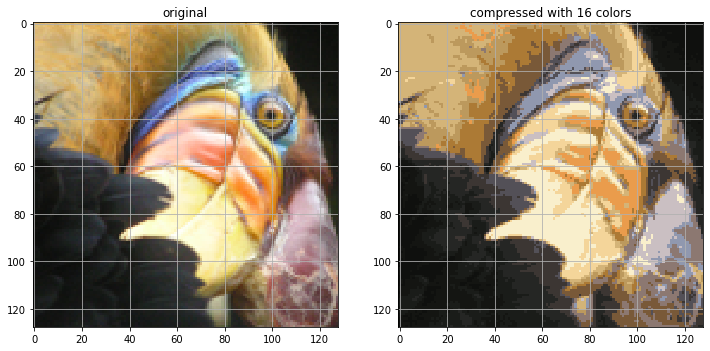

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('original')
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X_recovered)
plt.title(f'compressed with {K} colors')
plt.grid()

### 1.5 *K*-mean on my own image

Since the figure is extremely large, Scikit Learn's version of optimized K-Means algorithm with K-Means++ algorithm for finding initial centroids will be used.

Again, the image will be converted into the 4-bit image.

In [17]:
full = plt.imread('data/my-pretty-face.jpg')
full_size = full.shape
full_size

(2240, 2240, 3)

In [18]:
X = np.reshape(full, (full_size[0]*full_size[1], 3))
X.shape

(5017600, 3)

In [19]:
%%time
# time exec comparisson with the built-in sklearn KMeans function
model = KMeans(n_clusters=16, 
               init='k-means++', #using opt builtin param
               n_init=10,)

idx = model.fit_predict(X)

CPU times: user 3min 51s, sys: 48.4 s, total: 4min 40s
Wall time: 3min 21s


In [20]:
# image compression
centroids = model.cluster_centers_
X_recovered = np.asarray(centroids[np.asarray(idx, dtype=int), :], dtype=int)
X_recovered = np.reshape(X_recovered, (full_size[0], full_size[1], 3))

Text(0.5, 1.0, 'compressed with 16 colors')

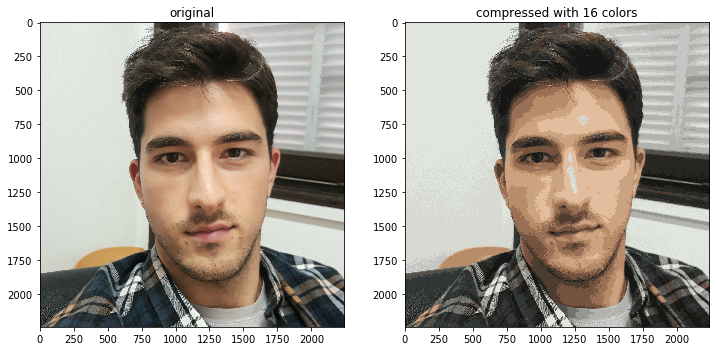

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(full)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(X_recovered)
plt.title(f'compressed with {K} colors')

## 2 Principal component analysis

Throughout this excercise, the principal component analysis (PCA) is used to perform dimensionality reduction. In the first part, PCA is applied to an example 2D dataset and in the second part, it is used on a bigger dataset of 5000 face images.

### 2.1 Example dataset

The idea behind this excercise is to reduce the data from 2D to 1D. In practice, this is usually applied to very high dimensional data (for example, reduce the data with 256 features to 50 features).

In [22]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA

In [23]:
dataset = loadmat('data/ex7data1.mat')
print(dataset['__header__'])
X = dataset['X']
print(f'shape of X: {X.shape}')

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011'
shape of X: (50, 2)


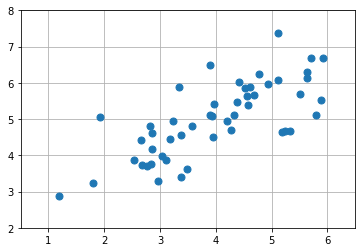

In [24]:
plt.plot(X[:, 0], X[:,1],
        linestyle='None',
        marker ='o', markersize='7',
        label='2D data')
plt.axis([0.5, 6.5, 2, 8])
plt.grid()
plt.show()

### 2.2 Implementing PCA

PCA implementation consists of two computational steps:
1. **computing the covariance matrix of the data**:

    $$ \Sigma = \frac{1}{m}X^T X $$
    where $X$ is the data matrix with examples in rows, and $m$ is the number of the examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator :)
    
    
2. **computing the eigenvectors**:

    using a singular value decomposition (SVD) method
    ```python
    U, S, V = np.linalg.SVD(Sigma)
    ```
    where $U$ will contain the principal components and $S$ will contain a diagonal matrix.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. 

In [25]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

def pca(X):
    m, n = X.shape
    U = np.zeros((n, n))
    S = np.zeros((n, n))
    
    Sigma = 1/m * X.T @ X
    U, S, V = np.linalg.svd(Sigma)
    return U, S

def sk_pca(X):
    pass

In [26]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
print(f'Top eigevector: {U[0, 0], U[1, 0]}')
print('(expected results: -0.707107 -0.707107)')

Top eigevector: (-0.7071067811865479, -0.7071067811865477)
(expected results: -0.707107 -0.707107)


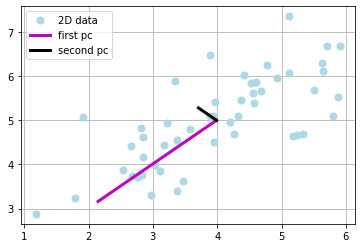

In [27]:
plt.plot(X[:, 0], X[:,1],
        linestyle='None', marker ='o', markersize='7', c='lightblue',
        label='2D data')

plt.plot([mu[0], mu[0] + 1.5*S[0]*U[0,0]], 
         [mu[1], mu[1] + 1.5*S[0]*U[0,1]], linewidth=3, c='m', 
         label='first pc')
plt.plot([mu[0], mu[0] + 1.5*S[1]*U[1,0]], 
         [mu[1], mu[1] + 1.5*S[1]*U[1,1]], linewidth=3, c='k',
         label='second pc')
plt.legend(loc='best')
plt.grid()
plt.show()

### 2.3 Dimensionality reduction 

Principal components can be used to reduce the feature dimension of the dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$. 
Here, the eigenvectors returned by PCA will be used to project the example dataset into a 1D space. 

To project data onto the principal components, projected data $Z$ is calculated by:

$$ Z = X U_{reduced} $$

where $X$ is the normalized data and $U_{reduced}$ is a sub-matrix of $U$ matrix, where only first K columns (K represents the number of dimensions we want to project data onto) are taken.

To reconstruct an approximation of the data, the process is reversed:

$$ X_{recovered} = Z U_{reduced} $$

In order to successfully reconstruct 99% of variance of the original data, the K should be smallest value that satisfies: 

$$
\frac{\frac{1}{m}\sum_{i=1}^{m}||x^{(i)} - X_{approx}^{(i)}||^2}{\frac{1}{m}\sum_{i=1}^{m}||x^{(i)}||^2} \leq 0.01
$$

where the expression in the numerator represents the average squared projection error, and the expression in the denominator represents total variation of the data.

Insted of iteratively calculating previous term, in order to find the best value for K, there is a computationally less demanding algorithm; for given K the term:

$$
1 - \frac{\sum_{i=1}^{k}S_{ii}}{\sum_{i=1}^{n}S_{ii}}
$$

where $S$ is a matrix with singular values for given data.

In [28]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    
    U_reduced = U[:, :K]
    Z = X @ U_reduced
    return Z

def recoverData(Z, U, K):
    X_recovered = np.zeros((Z.shape[0], U.shape[0]))
    
    X_recovered = Z @ U[:, :K].T
    return X_recovered

Projection of the first example:
1.4963126084578526
(this value should be about 1.481274)

Approximation of the first example:
(-1.0580527922154794, -1.0580527922154792)
(this value should be about -1.047419 -1.047419)



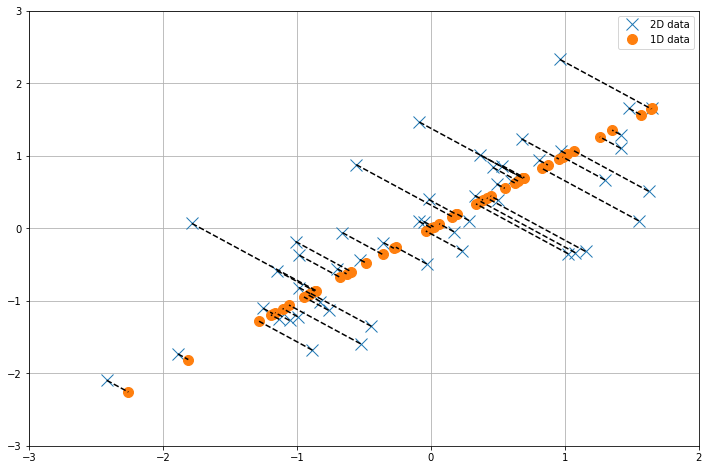

In [29]:
# visualization of the normalized dataset
plt.figure(figsize=(12, 8))
plt.plot(X_norm[:, 0], X_norm[:, 1],
         linestyle='None', marker ='x', markersize='12',
         label='2D data')
plt.axis([-3, 2, -3, 3])

# data projection
K = 1
Z = projectData(X_norm, U, K)
print(f'Projection of the first example:\n{Z.item(0)}')
print('(this value should be about 1.481274)')
print()

# data recovery
X_rec = recoverData(Z, U, K)
print(f'Approximation of the first example:\n{X_rec.item(0, 0), X_rec.item(0, 1)}')
print(f'(this value should be about -1.047419 -1.047419)')
print()

# draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 
         marker='o', linestyle='None', markersize='10',
         label='1D data')

for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0],X_rec[i,0]], 
             [X_norm[i,1],X_rec[i,1]],
             'k--')

plt.legend(loc='best')
plt.grid()
plt.show()

### 2.4 Dimensionality reduction 

In this part of the excercise, the PCA is applied to the dataset of face images, each 32x32 in grayscale. Each row of dataset is a vector of length 1024 data points that corresponds to one face image.

#### 2.4.1 PCA and dimensionality reduction of faces dataset

To run PCA on the face dataset, dataset has to be normalized by subtracting the mean of each feature from the data. Dimensionality reduction is performed by calculating principal components for the face dataset. This is usually performed in order to apply image dataset to some deep learning algorithm for object recognition. The learning algorithm will learn on smaller input size and thus speed up the learning process.

In [30]:
dataset = loadmat('data/ex7faces.mat')
X = dataset['X']
print(dataset['__header__'])
print(f'X size: {X.shape}')

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011'
X size: (5000, 1024)


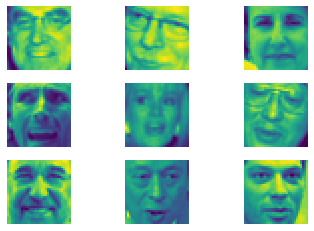

In [31]:
# display 9 random faces
np.random.seed(42)
rand_idx = [np.random.randint(X.shape[0]) for _ in range(9)]

for i, ri in enumerate(rand_idx):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(X[ri].reshape(32, 32).T)
plt.show()

In [32]:
# normalize the data
X_norm, mu, sigma = featureNormalize(X)

# run pca
U, S = pca(X_norm)

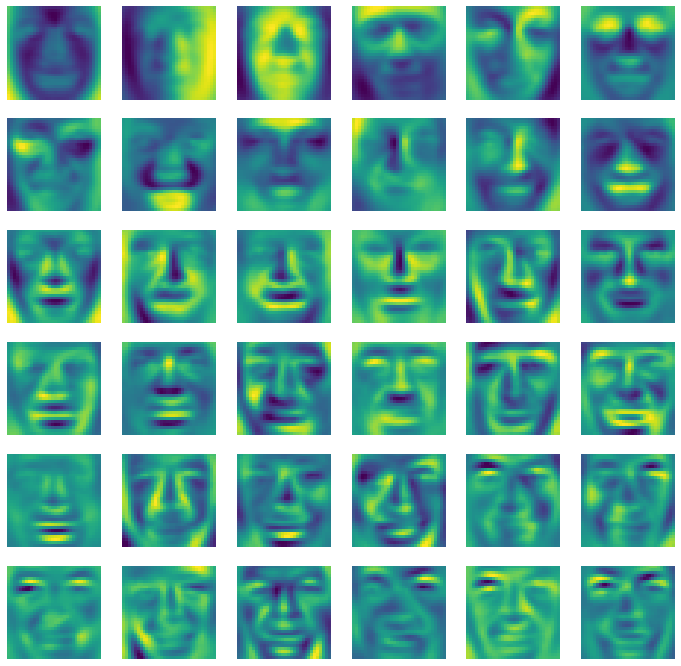

In [33]:
# visualize first 36 eigenfaces
plt.figure(figsize=(12, 12))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.axis('off')
    plt.imshow(U[:, i].reshape(32, 32).T)
plt.show()

In [34]:
# dimension reduction for faces
K = 100
Z = projectData(X_norm, U, K)
print(f'shape of projected data: {Z.shape}')

shape of projected data: (5000, 100)


In [35]:
# recovered faces
X_rec  = recoverData(Z, U, K)

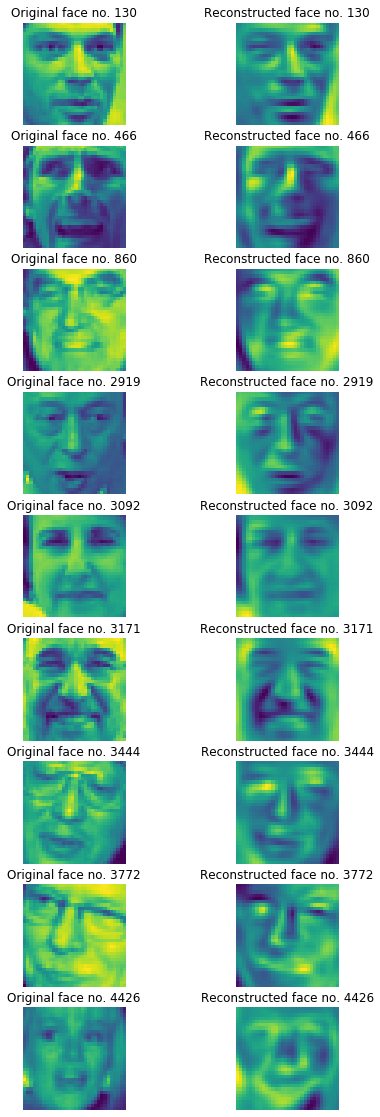

In [36]:
plt.figure(figsize=(7, 20))
i = 0
for ri in sorted(rand_idx):
    i=i+1
    plt.subplot(9,2,i)
    plt.axis('off')
    plt.imshow(X[ri].reshape(32, 32).T)
    plt.title(f'Original face no. {ri}')
    
    i=i+1
    plt.subplot(9,2,i)
    plt.axis('off')
    plt.imshow(X_rec[ri].reshape(32, 32).T)
    plt.title(f'Reconstructed face no. {ri}')
    
plt.show()

### 2.5 PCA for visualization

One useful application of PCA is to use it to visualize high-dimensional data. In the last *K*-means excercise the *K*-means algorithm was applied on 3D pixel colors of an image. 

Here, first part will be visualization of this output in 3D and then application of PCA to obtain a 2D visualization.

In [37]:
bird = plt.imread('data/bird_small.png')
img_size = bird.shape
print(f'shape of an image: {img_size}')

shape of an image: (128, 128, 3)


In [38]:
X = np.reshape(bird, (img_size[0]*img_size[1], 3))
K = 16
max_iters = 10
initial_centroids = KMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, max_iters)

K-means iteration 1/10
K-means iteration 2/10
K-means iteration 3/10
K-means iteration 4/10
K-means iteration 5/10
K-means iteration 6/10
K-means iteration 7/10
K-means iteration 8/10
K-means iteration 9/10
K-means iteration 10/10


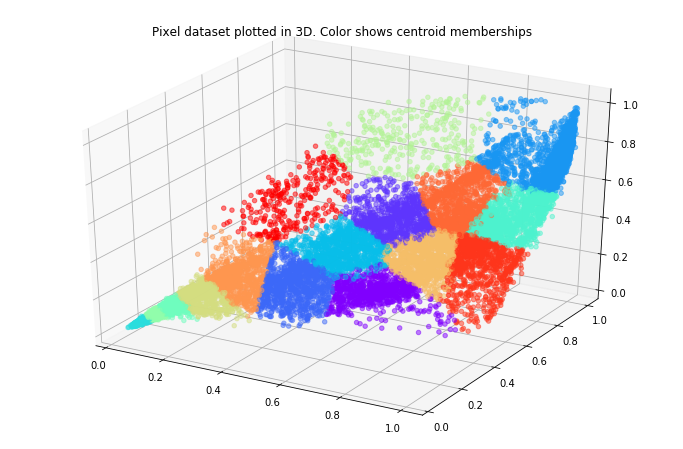

In [39]:
# 3d plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=idx, alpha=0.5, cmap='rainbow')
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

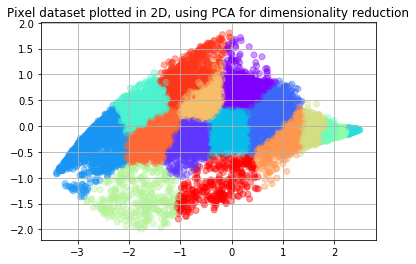

In [40]:
# 2d plot
X_norm, _, _ = featureNormalize(X) # normalization
U, S = pca(X_norm) # svd
Z = projectData(X_norm, U, K=2)

plt.scatter(Z[:, 0], Z[:, 1], c=idx, cmap='rainbow', alpha=0.4)
plt.grid(b=True)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()